In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np
import math
from pylab import *
#matplotlib.use('WXAgg')

def readin(filename):
  data = []
  with open(filename, 'r') as file_to_read:
    while True:
      lines = file_to_read.readline() 
      if not lines:
        break
        pass
      lines = [float(i) for i in lines.split()]
      data.append(lines) 
      pass
    data = np.array(data) 

  return data

In [19]:
def readincurrent(filename):
  data = []
  with open(filename, 'r') as file_to_read:
    while True:
      lines = file_to_read.readline() 
      if not lines:
        break
        pass
      lines = [float(i) for i in lines.split()]
      data.append(lines)
      pass
  data1 = data[0:2]
  data3 = data1[0]+data1[1]
  data2 = data[2:]
  data2 = np.array(data2) 
  data3 = np.array(data3)
  return data2,data3

def transferdata(data):
  metal = 2
  #metal2 = 6
  power = 0.8
  #print(data.shape)
  X = []
  Y = []
  Z = []
  x = []
  y = []
  z = []

  for i in(range(data.shape[0])):
    if data[i][2] == metal and  data[i][4] == power:
       X.append(data[i][0])
       Y.append(data[i][1])
       Z.append(data[i][3])
       if data[i][0] not in x:
         x.append(data[i][0])
       if data[i][1] not in y:
         y.append(data[i][1])
  X = np.array(X)
  Y = np.array(Y)
  Z = np.array(Z)    

  line_x = np.array(x)
  line_y  = np.array(y)

  Xmesh, Ymesh = np.meshgrid(line_x, line_y)
  #print(Xmesh)
  #print(Ymesh)
  z = np.zeros(Xmesh.shape)

  for k in(range(X.shape[0])):
    xindex=0
    yindex=0
    for i in(range(line_x.shape[0])):
        if X[k]==line_x[i]:
            xindex=i
            break
    for j in(range(line_y.shape[0])):
        if Y[k]==line_y[j]:
            yindex=j
            break
    z[yindex][xindex]=Z[k]
  '''
  for i in(range(line_x.shape[0])):
    for j in(range(line_y.shape[0])):
      for k in(range(X.shape[0])):
        if X[k]==line_x[i] and Y[k]==line_y[j]:
          z[j][i]=Z[k]
  '''
  for i in(range(line_x.shape[0])):
    for j in(range(line_y.shape[0])):
      if z[j][i]<0.5:
        #print('j= %d i= %d' %(j,i))
        z[j][i]=0.5*(z[j][i-1]+z[j][i+1])
    #print('finish print index %d' %(i))

  return Xmesh,Ymesh,z,line_x,line_y

def transfercurrent(data,line_x,line_y):
  metal = 2
  #metal2 = 6
  power = 0.8
  #print(data.shape)
  X = []
  Y = []
  Z = []
  x = []
  y = []
  z = []

  for i in(range(data.shape[0])):
    
       X.append(data[i][0])
       Y.append(data[i][1])
       Z.append(data[i][4])

  X = np.array(X)
  Y = np.array(Y)
  Z = np.array(Z)    

  Xmesh, Ymesh = np.meshgrid(line_x, line_y)
  #print(Xmesh)
  #print(Ymesh)
  z = np.zeros(Xmesh.shape)

  for k in(range(X.shape[0])):
    xindex=0
    yindex=0
    for i in(range(line_x.shape[0])):
        absx=abs(X[k] -line_x)
        absx = list(absx)
        xindex=absx.index(min(absx))
        break
    for j in(range(line_y.shape[0])):
        absy=abs(Y[k]-line_y)
        absy= list(absy)
        yindex=absy.index(min(absy))
        break
    z[yindex][xindex]=Z[k]
  '''
  for i in(range(line_x.shape[0])):
    for j in(range(line_y.shape[0])):
      for k in(range(X.shape[0])):
        if X[k]==line_x[i] and Y[k]==line_y[j]:
          z[j][i]=Z[k]
  
  for i in(range(line_x.shape[0])):
    for j in(range(line_y.shape[0])):
      if z[j][i]<0.5:
        print('j= %d i= %d' %(j,i))
        z[j][i]=0.5*(z[j][i-1]+z[j][i+1])
    print('finish print index %d' %(i))
  '''
  return Xmesh,Ymesh,z



def plotresult(Xmesh,Ymesh,z):
  fig = plt.figure()
  #ax1 =plt.subplot(2,1,1)
  ax1 = fig.gca(projection='3d')
  #X, Y, Z = axes3d.get_test_data(0.05)
  #ax1.plot_surface(Xmesh, Ymesh, z, rstride=1, cstride=1)
  ax1.plot_surface(Xmesh, Ymesh, z, rstride=1, cstride=1, cmap=cm.rainbow)
  cset = ax1.contour(Xmesh, Ymesh, z, zdir='z', offset=0.7, cmap=cm.rainbow)
  #cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
  #cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
  '''
  font1 = {'family' : 'Times New Roman','weight' : 'normal','size'   : 20}
  plt.tick_params(labelsize=20)
  x = range(0,120000,30000)
  plt.xticks(x,rotation=20)
  y = range(0,80000,20000)
  plt.yticks(y,rotation=-20)
  #ax1.set_xlabel('X',font1)
  ax1.set_xlim(0, 100000)
  #ax1.set_ylabel('Y',font1)
  ax1.set_ylim(0, 60000)
  #ax1.set_zlabel('   mV',font1)
  ax1.set_zlim(0.7, 0.8)
  #fig.savefig('demo.png', bbox_inches='tight')
  '''
  #plt.figure()
  #fig.savefig('demo.png', bbox_inches='tight')
  plt.show()

# coding=gbk
from PIL import Image
import numpy as np
# import scipy
import matplotlib.pyplot as plt

def ImageToMatrix(filename):

    im = Image.open(filename)

    width,height = im.size
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data,dtype='float')/255.0
    new_data = np.reshape(data,(width,height))
    return new_data

def MatrixToImage(data):
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im
    
def resizeresult(z):
  d = 32
  Z=np.zeros((d,d))
  x_d,y_d = z.shape[0],z.shape[1]
  x_incre=int(ceil(x_d/d))
  y_incre=int(ceil(y_d/d))
  print(x_incre)
  print(y_incre)
  for i in(range(d)):
    for j in(range(d)):
      
      Z[i][j]=np.mean(z[min(x_d-1,i*x_incre):min((i+1)*x_incre,x_d),min(y_d-1,j*y_incre):min((j+1)*y_incre,y_d)])
      #print(np.mean(z[min(x_d-1,i*x_incre):min((i+1)*x_incre,x_d),min(y_d-1,j*y_incre):min((j+1)*y_incre,y_d)]))             
  return Z

In [20]:
data=readin('../IR_drop.txt')

In [21]:
Xmesh,Ymesh,z,line_x,line_y=transferdata(data)

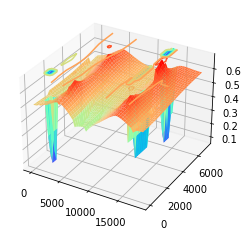

In [22]:
plotresult(Xmesh,Ymesh,z)